In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os
import random

# Pre-processing

In [9]:
# Read Train & Test Files

#Kaggle
#train_file = bz2.BZ2File('../input/train.ft.txt.bz2')
#test_file = bz2.BZ2File('../input/test.ft.txt.bz2')

#Localhost
#train_file = bz2.BZ2File('C:/Users/Lenovo/Documents/GitHub/Datasets/amazonreviews/train.ft.txt.bz2')
#test_file = bz2.BZ2File('C:/Users/Lenovo/Documents/GitHub/Datasets/amazonreviews/test.ft.txt.bz2')

#Localhost - Versión recortada del archivo
train_file = bz2.BZ2File('C:/Users/Lenovo/Documents/GitHub/Datasets/amazonreviews/Version_Recortada/r_train.ft.txt.bz2')
test_file = bz2.BZ2File('C:/Users/Lenovo/Documents/GitHub/Datasets/amazonreviews/Version_Recortada/r_test.ft.txt.bz2')

#Create Lists containing Train & Test sentences
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

#Convert from raw binary strings to strings that can be parsed
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [10]:
print("Cantidad de elementos del Training Set: {}".format(len(train_file_lines)))
print("Cantidad de elementos del Testing Set: {}".format(len(test_file_lines)))

Cantidad de elementos del Training Set: 100000
Cantidad de elementos del Testing Set: 30000


## Clean data

In [11]:
# Change labels: __label__1 -> 0 (Negative) / __label__2 -> 1 (Positive)
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]

# Make everything Lower Case
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file_lines]

for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])
    
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file_lines]

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])

# Modify URLs to <url>
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

## Checking data before and after cleaning

In [12]:
#Random
r = random.randint(1,len(train_file_lines))

#Before
print("Data before cleaning:\n{}".format(train_file_lines[r-1:r]))

#After
print("\nData after cleaning:\n{}".format((train_sentences[r-1:r])))

#Labels
print("\nLabel:{}".format(train_labels[r-1:r]))

Data before cleaning:
["__label__1 Bad Lieutenant = Bad Movie: I gave up on this thing halfway through. I just could not watch any more. Cage runs around in a badly cut suit, his head turned at an angle as if he can't hear the director, and there is no discernible plot or purpose. We don't notice Cage's bad acting the way we did in Wicker Man, because all the rest of the actors are so bad Cage does not stand out. One good thing about the movie is, Cage plays a coke addict. The bad thing about it is, he didn't OD and give us all a break.We can give this one a pass, though.\r\n"]

Data after cleaning:
["bad lieutenant = bad movie: i gave up on this thing halfway through. i just could not watch any more. cage runs around in a badly cut suit, his head turned at an angle as if he can't hear the director, and there is no discernible plot or purpose. we don't notice cage's bad acting the way we did in wicker man, because all the rest of the actors are so bad cage does not stand out. one good 

### Output
From the above output it can be seen that each sentence begins with it's sentiment (label1 -> Negative, label2 -> Positive), which is then followed by the review and ends with a newline character \n.

So, first I go convert all the labels to O(Negative) and 1(Positive) and store it in lists that only contain the label values. After this, I store the remainder of the sentence excluding the newline character in lowercase in lists. Also, convert all numbers to 0.


## Text Pre-processing

In [13]:
from keras.preprocessing import text, sequence

#Base definitions for text preprocessing
max_features = 20000
maxlen = 100

In [14]:
#Tokenizer definition
#Filtro caracteres especiales usando el Tokenizer de keras.
tokenizer = text.Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')

#Fit on text -> Only the train dataset !!!
tokenizer.fit_on_texts(train_sentences)

#Training set
tokenized_train = tokenizer.texts_to_sequences(train_sentences)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

#Test set
tokenized_test = tokenizer.texts_to_sequences(test_sentences)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [15]:
#Print a random matrix
X_train[r]
# summarize what was learned -> Si quiero ver el tokenizer que aprendio usando los 2 parametros (Max_features,max_length)
#print(t.word_counts)
#print(t.document_count)
#print(t.word_index)
#print(t.word_docs)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,    35,   117,    31,
        1895,   116,   143,   118,   236,     4,   117, 11480,  3592,
          31,     8,    45,    26,     1,    72,    83,   547,   802,
           7,    45,   186,     2,    55,   118,   191,     7,   149,
          11])

## Model

In [16]:
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
from keras.models import Sequential
from keras.layers import Convolution1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization
from keras.layers.embeddings import Embedding

In [17]:
#Defino los parametros del modelo:
p = 0.25 #Dropout
lr = 0.0001 #Learning Rate
batch_size = 1024
epochs = 10

#Embedding size -> Ver para que sirve, todavia falta entenderlo?
embed_size = 32

In [18]:
# Creo el modelo
model=Sequential()

#Embedding
model.add(Embedding(max_features, embed_size, input_length=maxlen))

#CNN
model.add(Convolution1D(filters=4, kernel_size=2, padding="same", name='Conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(p))

#model.add(Convolution1D(filters=32, kernel_size=3, padding="same", name='Conv2',input_shape=input_shape))
model.add(Convolution1D(filters=8, kernel_size=2, padding="same", name='Conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(p))

model.add(MaxPooling1D(pool_size=2, name='MaxPool1'))
model.add(Dropout(p))

model.add(Flatten())

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(p))

model.add(Dense(1, activation='softmax'))

model.summary()

#Optimizers
ADAM = optimizers.Adam(lr=lr)
model.compile(loss = 'binary_crossentropy', optimizer=ADAM, metrics=['binary_accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           640000    
_________________________________________________________________
Conv1 (Conv1D)               (None, 100, 4)            260       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 4)            16        
_________________________________________________________________
activation_1 (Activation)    (None, 100, 4)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 4)            0         
_________________________________________________________________
Conv2 (Conv1D)               (None, 100, 8)            72        
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 8)            32        
__________

In [19]:
# Callbacks

## Callback para guardar pesos
checkpointer = ModelCheckpoint(filepath='CNN_Sentiment_Analysis_Amazon_Reviews.hdf5', monitor='val_loss'
                                   ,verbose=1, save_best_only=True, mode='min')
callbacks = [checkpointer]

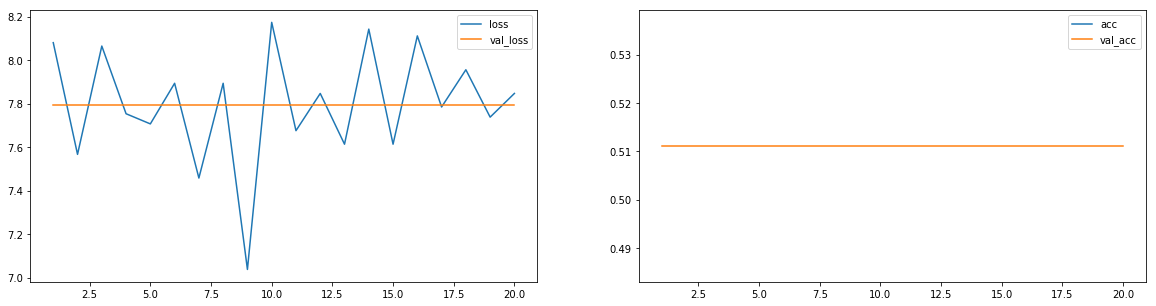

In [20]:
# Fit del modelo
model.fit(X_train
          ,train_labels
          ,epochs=epochs
          ,batch_size = batch_size          
          ,shuffle = True
          ,validation_split=0.20
          ,callbacks=callbacks)

#Agregar en caso de utilizar el plot_losses() => Separar el train en validation data.
#,validation_data = (x_valid, y_val_categorical)

## Test 

In [21]:
score, acc = model.evaluate(X_test, test_labels, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

30000/30000 [==============================] - 2s 63us/step
Test score: 7.794231762186686
Test accuracy: 0.5111000001907349
